# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Science IT Support, University Of Bern, 2021

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Solutions to Part 2.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

import umap
from scipy.stats import entropy

ModuleNotFoundError: ignored

In [2]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    !tar -xvzf colab_material.tgz > /dev/null 2>&1

196608/184367 [===============================] - 0s 0us/step


In [3]:
from utils.routines import *

# EXERCISE 1: Discover the number of Gaussians

(120, 5)
Number of clusters considered:  2
Number of clusters considered:  3
Number of clusters considered:  4
Number of clusters considered:  5
Number of clusters considered:  6
Number of clusters considered:  7
Number of clusters considered:  8
Number of clusters considered:  9
Number of clusters considered:  10
Number of clusters considered:  11
Number of clusters considered:  12
Number of clusters considered:  13
Number of clusters considered:  14


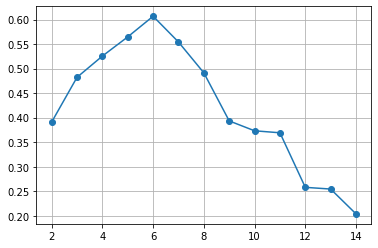

In [7]:
### In this exercise you are given the dataset points, consisting of high-dimensional data. It was built taking random 
#samples from a number k of multimensional gaussians. The data is therefore made of k clusters but, being 
#very high dimensional, you cannot visualize it. Your task it too use K-means combined with the Silouhette 
#score to find the number of k.

# 1. Load the data using the function load_ex1_data_clust() , check the dimensionality of the data.

points=load_ex1_data_clust()
print(points.shape)

# 2. Fix a number of clusters k and define a KMeans clusterer object. Perform the fitting and compute the Silhouette score. 
# Save the results on a list. 

plt.figure()
scores=[]
for itrial in range(2,15):
    print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(points)
    score=silhouette_score(points,cluster_labels)
    scores.append(score)

# 3. Plot the Silhouette scores as a function ok k? What is the number of clusters ?
plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')

# 4. Optional. Check the result that you found via umap. 
#plt.figure()
#umap_model = umap.UMAP(random_state=1711)
#umap_gs = umap_model.fit_transform(points)
#plt.scatter(umap_gs[:, 0], umap_gs [:, 1], s=20)

# EXERCISE 2: Predict the good using K-Means

In [4]:
# Follow the following STEPS to solve the exercise

# STEP 1. Load the dataset.

#fmnist = tf.keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

#X_train=train_images[:5000,:].reshape(5000,-1)
#y_train=train_labels[:5000]

#X_test=test_images[:1000,:].reshape(1000,-1)
#y_test=test_labels[:1000]

fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

X_train=train_images[:5000,:].reshape(5000,-1)
y_train=train_labels[:5000]

X_test=test_images[:1000,:].reshape(1000,-1)
y_test=test_labels[:1000]

# STEP 2. 
# Define the cluster KMeans objecta and fit the model on the training set. 

clusterer = KMeans(n_clusters=10, random_state=10)
clusterer.fit(X_train)

# STEP 3. 
# Call the predict method of the KMeans object you defined on the training set and compute the cluster labels. 
# 
cluster_labels = clusterer.predict(X_train)

# STEP 4. 
# Use the function most_common with arguments (k,y_train, cluster_labels) to compute the assignement list. 
#  assignement[i] will be the majority class of the i-cluster  

def most_common(nclusters, supervised_labels, cluster_labels):
    
    """
    Args:
    - nclusters : the number of clusteres
    - supervised_labels : for each sample, the labelling provided by the training data ( e.g. in y_train or y_test)
    - cluster_labels : for each good, the cluster it was assigned by K-Means using the predict method of the Kmeans object
    
    Returns:
    - a list "assignement" of lengths nclusters, where assignement[i] is the majority class of the i-cluster 
    """
    
    assignement=[]
    for icluster in range(nclusters):
        indices=list(supervised_labels[cluster_labels==icluster])
        try:
            chosen= max(set(indices), key=indices.count)
        except ValueError :
            print('Em')
            chosen=1
        assignement.append(chosen)
        
    return assignement

assignement=most_common(10, y_train, cluster_labels)     

print(assignement)

# STEP 5. 
# Using the predict method of your KMeans object, predict the cluster labels for the test set using X_test as an argument.

### print('Training set')
### cluster_labels = clusterer.predict(X_train)
### new_labels=[assignement[i] for i in cluster_labels]
### cm=metrics.confusion_matrix( y_train, new_labels)
### print(np.sum([cm[i,i] for i in range(cm.shape[0])])/np.sum(cm))
### print(cm)

cluster_labels = clusterer.predict(X_test)

# STEP 6.
# using the cluster labels predicted in STEP 5 and the previously computed assignement[] list, 
# predict what are according to your model the predicted goods for the test set, call them new_labels
print()
print('Test set')

new_labels=[assignement[i] for i in cluster_labels]

# STEP 7.
# Using  a call cm=metrics.confusion_matrix( y_train, new_labels ) you can print the confusion matrix on the test set, which
# provides information on the quality of the fit. You can print the percentage of correctly classified examples 
# using the following lines:
#
# print(np.sum([cm[i,i] for i in range(cm.shape[0])])/np.sum(cm))
# print(cm)

cm=metrics.confusion_matrix( y_test, new_labels)
print(np.sum([cm[i,i] for i in range(cm.shape[0])])/np.sum(cm))
print(cm)

# STEP 8 (optional).
#  Perform again steps 2 / 3 increasing the number of clusters from 10 to 40 what happens to the performance ? 
for iclust in [10,20,30,40]:
    
        clusterer = KMeans(n_clusters=iclust, random_state=10)

        clusterer.fit(X_train)

        cluster_labels = clusterer.predict(X_train)
    
        assignement=most_common(iclust, y_train, cluster_labels)     

        print(assignement)
        
        print('Test set with '+str(iclust)+' clusters')

        cluster_labels = clusterer.predict(X_test)

        new_labels=[assignement[i] for i in cluster_labels]

        cm=metrics.confusion_matrix( y_test, new_labels)

        print(np.sum([cm[i,i] for i in range(cm.shape[0])])/np.sum(cm))
        print(cm)

4431872/4422102 [==============================] - 0s 0us/step
[7, 8, 6, 1, 8, 0, 9, 5, 9, 4]

Test set
0.549
[[62  3  0  0  7 10 25  0  0  0]
 [ 5 95  0  0  0  1  4  0  0  0]
 [ 2  0  0  0 68  7 33  0  1  0]
 [25 50  0  0  1  5 12  0  0  0]
 [20  3  0  0 73  2 17  0  0  0]
 [ 0  0  0  0  0 56  0 21  0 10]
 [20  1  0  0 28 12 34  0  2  0]
 [ 0  0  0  0  0  9  0 71  0 15]
 [ 0  1  0  0  6  7 10  2 68  1]
 [ 0  0  0  0  0  1  0  4  0 90]]
[7, 8, 6, 1, 8, 0, 9, 5, 9, 4]
Test set with 10 clusters
0.549
[[62  3  0  0  7 10 25  0  0  0]
 [ 5 95  0  0  0  1  4  0  0  0]
 [ 2  0  0  0 68  7 33  0  1  0]
 [25 50  0  0  1  5 12  0  0  0]
 [20  3  0  0 73  2 17  0  0  0]
 [ 0  0  0  0  0 56  0 21  0 10]
 [20  1  0  0 28 12 34  0  2  0]
 [ 0  0  0  0  0  9  0 71  0 15]
 [ 0  1  0  0  6  7 10  2 68  1]
 [ 0  0  0  0  0  1  0  4  0 90]]
[0, 9, 2, 5, 2, 6, 1, 3, 3, 0, 8, 1, 9, 4, 8, 2, 5, 9, 2, 7]
Test set with 20 clusters
0.649
[[72  0  6  7  2  0 20  0  0  0]
 [ 4 94  0  4  0  0  3  0  0  0]
 [ 2  

# EXERCISE 3 : Find the prediction uncertainty

In [ ]:
#In this exercise you need to load the dataset used to present K-means ( def km_load_th1() ) or the one used to discuss 
# the Gaussian mixtures model ( def gm_load_th1() ). 
#As discussed, applying a fitting based on gaussian mixtures you can not only predict the cluster label for each point, 
#but also a probability distribution over the clusters. 

#From this probability distribution, you can compute for each point the entropy of the corresponging 
#distribution (using for example scipy.stats.entropy) as an estimation of the undertainty of the prediction. 
#Your task is to plot the data-cloud with a color proportional to the uncertainty of the cluster assignement.

# In detail you shoud:
# 1. Instantiate a GaussianMixture object with the number of clusters that you expect
# 2. fit the object on the dataset with the fit method 

from scipy.stats import entropy
points=gm_load_th1()

plt.figure()
clf = GaussianMixture(n_components=3, covariance_type='full')

clf.fit(points)

# 3. compute the cluster probabilities using the method predict_proba. This will return a matrix of 
# dimension npoints x nclusters
# 4. use the entropy function ( from scipy.stats import entropy ) to evaluate for each point the uncertainty of the 
#prediction

cluster_labels_prob=clf.predict_proba(points)

entropies=[]
for point in range(len(cluster_labels_prob)):
    entropies.append(entropy(cluster_labels_prob[point]))

# 5. Plot the points colored accordingly to their uncertanty. 

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(points[:,0], points[:,1], c=entropies, cmap=cm)
plt.colorbar(sc)
    

# EXERCISE 4.

Load some image, downscale to a similar resolution, and train a deeper model, for example 5 layers, more parameters in widest layers.

In [ ]:
# solution

# 1. Load your image
url = 'https://www.unibe.ch/unibe/portal/content/e796/e803/e59463/e805/e911258/e913259/e995758/media_service995760/01_20200910_MMUniBE_Semesterstart2020_Hauptgebaeude_1800pUniBE_ger.jpg'
image_big = imread(url)
image_big = image_big[...,0:3]/255
plt.imshow(image_big)

image = image_big[::14, ::14]
plt.imshow(image)
plt.show()

h, w, c = image.shape
X = np.meshgrid(np.linspace(0, 1, w), np.linspace(0, 1, h))
X = np.stack(X, axis=-1).reshape((-1, 2))

Y = image.reshape((-1, c))
X.shape, Y.shape


# 2. build a deeper model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(c, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
model.summary()

# 3. inspect the evolution

ims = []
n_ep_tot = 0
for i in range(200):
  if i % 10 == 0:
    print(f'epoch {i}', end='\n')
  ne = (2 if (i<50) else (20 if (i<100) else (200 if (i<150) else 1000)))
  model.fit(X, Y, epochs=ne, batch_size=1*2048, verbose=0)

  Y_p = model.predict(X)
  Y_p = Y_p.reshape((h, w, c))
  ims.append(Y_p)
  n_ep_tot += ne

print(f'total numer of epochs trained:{n_ep_tot}')

plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript
fig = plt.figure()
im = plt.imshow(ims[0])

def animate(i):
    img = ims[i]
    im.set_data(img)
    return im

ani = animation.FuncAnimation(fig, animate, frames=len(ims))

ani

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
def plot_contour(image):
  h, w = image.shape
  c = 1
  X2, Y2 = np.meshgrid(np.linspace(0, 1, w), np.linspace(1, 0, h))
  Z2 = image

  # Normalize the colors based on Z value
  norm = plt.Normalize(Z2.min(), Z2.max())
  colors = cm.cubehelix(norm(Z2))
  plt.figure(figsize=(10, 10))
  ax = plt.axes(projection='3d')

  ax.view_init(60, -60)
  ax.contour3D(X2, Y2, Z2, 55, cmap='terrain')

In [ ]:
# solution

# 1. Load your image

image = train_images[2022]/255

plt.imshow(image, cmap='gray')
plt.show()

h, w = image.shape
c = 1
X = np.meshgrid(np.linspace(0, 1, w), np.linspace(0, 1, h))
X = np.stack(X, axis=-1).reshape((-1, 2))

Y = image.reshape((-1, c))



# 2. build a deeper model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(c, activation=None),
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse',
              metrics=['mse'])
model.summary()

# 3. inspect the evolution

hist = []
ims = []
n_ep_tot = 0
for i in range(170):
  if i % 10 == 0:
    print(f'epoch {i}', end='\n')
  ne = (2 if (i<50) else (20 if (i<100) else (200 if (i<150) else 1000)))
  
  if i == 90:
    model.optimizer.learning_rate.assign(0.0001)

  hist_c = model.fit(X, Y, epochs=ne, batch_size=16, verbose=0)

  hist.extend(hist_c.history['loss'])

  Y_p = model.predict(X)
  Y_p = Y_p.reshape((h, w))
  ims.append(Y_p)
  n_ep_tot += ne

print(f'total numer of epochs trained:{n_ep_tot}')

plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript
fig = plt.figure()
im = plt.imshow(ims[0], cmap='gray', vmin=0, vmax=1)

def animate(i):
    img = ims[i]
    im.set_data(img)
    return im

ani = animation.FuncAnimation(fig, animate, frames=len(ims))

ani

In [ ]:
plt.plot(hist)

In [ ]:
s = 40
wr = 28*s
hr = 28*s
Xr = np.meshgrid(np.linspace(0, 1, wr), np.linspace(0, 1, hr))
Xr = np.stack(Xr, axis=-1).reshape((-1, 2))

Yr = model.predict(Xr)
Yr = Yr.reshape((hr, wr))

plt.figure(figsize=(10,10))
plt.imshow(Yr, cmap='gray')

In [ ]:
plot_contour(image)

In [ ]:
plot_contour(Yr)